In [4]:
import os
import findspark
os.environ['PYSPARK_SUBMIT_ARGS'] = (
    "--repositories http://repo.hortonworks.com/content/groups/public/ "
    "--packages com.hortonworks:shc-core:1.1.1-2.1-s_2.11 "
    " pyspark-shell")
findspark.init()
from pyspark import SparkContext
from pyspark.sql import SQLContext
import json

In [5]:
sc = SparkContext()
sqlc = SQLContext(sc)

In [6]:
data_source_format = 'org.apache.spark.sql.execution.datasources.hbase'
TABLE = "20181210_224422_alexdziena_tweets"
#TABLE = "20181212_030403_alexdziena_tweets"

In [7]:
catalog = json.dumps({
    "table":{"namespace":"default", "name":TABLE},
    "rowkey":"row_id",
    "columns":{
        "row_id":{"cf":"rowkey", "col":"row_id", "type":"string"},
        "category":{"cf":"tweet", "col":"category", "type":"string"},
        "contributors":{"cf":"tweet", "col":"contributors", "type":"string"},
        "coordinates":{"cf":"tweet", "col":"coordinates", "type":"string"},
        "created_at":{"cf":"tweet", "col":"created_at", "type":"string"},
        "display_text_range":{"cf":"tweet", "col":"display_text_range", "type":"string"},
        "entities":{"cf":"tweet", "col":"entities", "type":"string"},
        "extended_tweet":{"cf":"tweet", "col":"extended_tweet", "type":"string"},
        "favorite_count":{"cf":"tweet", "col":"favorite_count", "type":"bigint"},
        "favorited":{"cf":"tweet", "col":"favorited", "type":"boolean"},
        "filter_level":{"cf":"tweet", "col":"filter_level", "type":"string"},
        "geo":{"cf":"tweet", "col":"geo", "type":"string"},
        "id":{"cf":"tweet", "col":"id", "type":"bigint"},
        "in_reply_to_screen_name":{"cf":"tweet", "col":"in_reply_to_screen_name", "type":"string"},
        "in_reply_to_status_id":{"cf":"tweet", "col":"in_reply_to_status_id", "type":"string"},
        "in_reply_to_status_id_str":{"cf":"tweet", "col":"in_reply_to_status_id_str", "type":"string"},
        "in_reply_to_user_id":{"cf":"tweet", "col":"in_reply_to_user_id", "type":"string"},
        "in_reply_to_user_id_str":{"cf":"tweet", "col":"in_reply_to_user_id_str", "type":"string"},
        "is_quote_status":{"cf":"tweet", "col":"is_quote_status", "type":"boolean"},
        "lang":{"cf":"tweet", "col":"lang", "type":"string"},
        "place":{"cf":"tweet", "col":"place", "type":"string"},
        "quote_count":{"cf":"tweet", "col":"quote_count", "type":"bigint"},
        "reply_count":{"cf":"tweet", "col":"reply_count", "type":"bigint"},
        "retweet_count":{"cf":"tweet", "col":"retweet_count", "type":"bigint"},
        "retweeted":{"cf":"tweet", "col":"retweeted", "type":"boolean"},
        "source":{"cf":"tweet", "col":"source", "type":"string"},
        "text":{"cf":"tweet", "col":"text", "type":"string"},
        "timestamp_ms":{"cf":"tweet", "col":"timestamp_ms", "type":"bigint"},
        "truncated":{"cf":"tweet", "col":"truncated", "type":"boolean"},
    }
})


# Writing
#df.write\
#.options(catalog=catalog)\  # alternatively: .option('catalog', catalog)
#.format(data_source_format)\
#.save()

# Reading
df = sqlc.read\
.options(catalog=catalog)\
.format(data_source_format)\
.load()



In [8]:
df.printSchema()
df.head()

root
 |-- row_id: string (nullable = true)
 |-- category: string (nullable = true)
 |-- contributors: string (nullable = true)
 |-- coordinates: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- display_text_range: string (nullable = true)
 |-- entities: string (nullable = true)
 |-- extended_tweet: string (nullable = true)
 |-- favorite_count: long (nullable = true)
 |-- favorited: boolean (nullable = true)
 |-- filter_level: string (nullable = true)
 |-- geo: string (nullable = true)
 |-- id: long (nullable = true)
 |-- in_reply_to_screen_name: string (nullable = true)
 |-- in_reply_to_status_id: string (nullable = true)
 |-- in_reply_to_status_id_str: string (nullable = true)
 |-- in_reply_to_user_id: string (nullable = true)
 |-- in_reply_to_user_id_str: string (nullable = true)
 |-- is_quote_status: boolean (nullable = true)
 |-- lang: string (nullable = true)
 |-- place: string (nullable = true)
 |-- quote_count: long (nullable = true)
 |-- reply_count: long

Row(row_id='1068445295007084544', category='electronics', contributors='None', coordinates='None', created_at='Fri Nov 30 10:03:03 +0000 2018', display_text_range=None, entities=None, extended_tweet=None, favorite_count=52, favorited=False, filter_level=None, geo='None', id=1068445295007084544, in_reply_to_screen_name='None', in_reply_to_status_id='None', in_reply_to_status_id_str='None', in_reply_to_user_id='None', in_reply_to_user_id_str='None', is_quote_status=False, lang='en', place='None', quote_count=None, reply_count=None, retweet_count=20, retweeted=False, source='<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', text='Sony is releasing limited edition high quality wireless headphones and the Sony Walkman A series for… https://t.co/osW6rFWEA3', timestamp_ms=None, truncated=False)

In [26]:
dfsummed=df.selectExpr(
    "row_id",
    "contributors",
    "geo",
    "coordinates",
    "source",
    "lang",
    "created_at",
    "category",
    "text",
    "id",
    "place",
    "favorite_count",
    "reply_count",
    "retweet_count",
    "quote_count",
    "retweeted",
    "timestamp_ms"
).where("favorite_count > 0 or retweet_count > 0").show(10)

+-------------------+------------+----+-----------+--------------------+----+--------------------+-----------+--------------------+-------------------+--------------------+--------------+-----------+-------------+-----------+---------+------------+
|             row_id|contributors| geo|coordinates|              source|lang|          created_at|   category|                text|                 id|               place|favorite_count|reply_count|retweet_count|quote_count|retweeted|timestamp_ms|
+-------------------+------------+----+-----------+--------------------+----+--------------------+-----------+--------------------+-------------------+--------------------+--------------+-----------+-------------+-----------+---------+------------+
|1068445295007084544|        None|None|       None|<a href="http://t...|  en|Fri Nov 30 10:03:...|electronics|Sony is releasing...|1068445295007084544|                None|            52|       null|           20|       null|    false|        null|
|106

# Visually explore the result

#Convert Spark Dataframe into Panda to use matplotlib

In [9]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd_df = (df.selectExpr(
    "row_id",
    "source",
    "lang",
    "created_at",
    "category",
    "text",
    "id",
    "place",
    "favorite_count",
    "retweet_count"
).where("favorite_count > 0 or retweet_count > 0")).toPandas()

#plt.show(display(df.select("category","favorite_count").groupBy("category").agg(avg("favorite_count"))))

In [29]:
pd_df.to_csv("tweetssummary")

In [ ]:

pd_df = (df.selectExpr(
    "text"
).where("favorite_count > 0 or retweet_count > 0")).toPandas()
pd_df.head()

In [16]:
import sys
!{sys.executable} -m pip install wordcloud

    100% |████████████████████████████████| 368kB 5.1MB/s ta 0:00:01


In [ ]:
nltk.download("stopwords")
from wordcloud import WordCloud
from nltk.corpus import stopwords

cloud = WordCloud(background_color="white", max_words=20, stopwords=stopwords.words('english'))

positive_cloud = cloud.generate(df.loc[pd_df.classe == 'text'].str.cat(sep='\n'))
plt.figure()
plt.imshow(positive_cloud)
plt.axis("off")
plt.show()

In [14]:
import multiprocessing as mp
import time
#from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def change_digit(word):
    if word.isdigit():
        if str(word).startswith('08') or str(word).startswith('628'):
            return 'xxhpnum'
        elif str(word).startswith('120'):
            return 'xxordernum'
        else:
            return 'xxothernum'
    else:
        return word

def filter_word(word_token):
  word_token = [change_digit(word) for word in word_token if word not in nltk.corpus.stopwords.words('indonesian')]
  return word_token

def filter_word_for_bq(word_token):
  word_token = [word for word in word_token if word not in nltk.corpus.stopwords.words('indonesian') and not word.isdigit()]
  return word_token

def process(df):
    df_result = pd.DataFrame()
    df_result['stem'] = df['original_question'].apply(lambda x: stemmer.stem(x))
    df_result['no_punc'] = df_result['stem'].apply(lambda x: x.lower().translate(string.punctuation))
    df_result['word_token'] = df_result['no_punc'].apply(lambda x: nltk.word_tokenize(x))
    df_result['word_token_filtered'] = df_result['word_token'].apply(lambda x: filter_word(x))
    df_result['word_token_filtered_for_bq'] = df_result['word_token'].apply(lambda x: filter_word_for_bq(x))
    df_result['word_token_filtered_string'] = df_result['word_token_filtered'].apply(lambda x: ','.join(x))
    df_result['word_token_filtered_string_for_bq'] = df_result['word_token_filtered_for_bq'].apply(lambda x: ','.join(x))
    return df_result

temp_store_df = pd_df.copy()

start=time.time()
#factory = StemmerFactory()
#stemmer = factory.create_stemmer()

process(temp_store_df)

final_store_df = temp_store_df.copy()
end=time.time()

print("took "+str((end-start))+" s")

final_store_df.head()

KeyError: 'original_question'

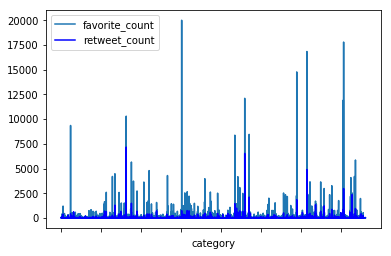

In [30]:
ax = plt.gca()

pd_df.plot(kind="line", x="category",y="favorite_count",ax=ax)
pd_df.plot(kind="line", x="category",y="retweet_count", color="blue",ax=ax)

#plt.show()


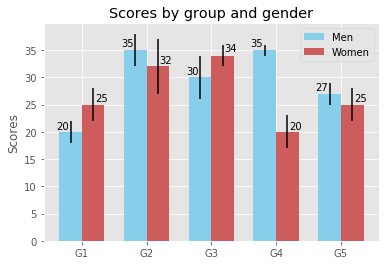

In [20]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

men_means, men_std = (20, 35, 30, 35, 27), (2, 3, 4, 1, 2)
women_means, women_std = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, men_means, width, yerr=men_std,
                color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, women_means, width, yerr=women_std,
                color='IndianRed', label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

plt.show()